In [1]:
 
# time  : 2020/6/24 10:29
# author :wujiajia
# email :wujiajia666@qq.com
# file  : gzh_zhihu_requests_v2.py
# Software: PyCharm
# python_version: 
# funcation:
# 功能：爬取知乎某个问题下的所有评论
# 知乎评论爬虫特点：ajax响应， 需要解析url 地址。登入知乎账号后，找到某个问题的所有评论，
# <-- 查看network 中的  answers 的 xhr 信息， 解析它的url地址。
import pandas as pd
import requests
import time
 
zid = []  # 保存用户id
ztime = []  # 保存用户发表评论的时间
zname = []  # 保存用户姓名
zcomment = []  # 保存用户评论内容
totals = []  # 记录评论的总条数

In [2]:

def zhuhuSipder(page):
    url = "https://www.zhihu.com/api/v4/questions/488891947/answers"
    #https://www.zhihu.com/api/v4/questions/488891947/answers?include=data[*].is_normal,admin_closed_comment,reward_info,is_collapsed,annotation_action,annotation_detail,collapse_reason,is_sticky,collapsed_by,suggest_edit,comment_count,can_comment,content,editable_content,attachment,voteup_count,reshipment_settings,comment_permission,created_time,updated_time,review_info,relevant_info,question,excerpt,is_labeled,paid_info,paid_info_content,relationship.is_authorized,is_author,voting,is_thanked,is_nothelp,is_recognized;data[*].mark_infos[*].url;data[*].author.follower_count,vip_info,badge[*].topics;data[*].settings.table_of_content.enabled&offset=&limit=3&sort_by=default&platform=desktop
    # url = "https://www.zhihu.com/api/v4/questions/264739425/answers"  # 全国吃辣排行榜
    # 必须添加cookie 信息
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64; rv:57.0) Gecko/20100101 Firefox/57.0',
               "cookie": '_zap=7a1c6dab-1410-4313-aba2-c21e63d4d24d; d_c0="ALBe4YrmXROPToc04XpfiZc3Myzrf2nUssE=|1625499074"; _9755xjdesxxd_=32; YD00517437729195:WM_TID=xBFS3dpOnahAAVBFUFd+ziPyO2LQFXf6; gdxidpyhxdE=ha6g16ufKq7bDG25EzTlc3enj+aDZyEoSsOn47yofa9X8s1yV5KlMjmKNiO7XLZqL69SX2K4BwV+VzI7kShK1L/s1lHOhv3QALUmVlnMw7n66ffCJNAAmfQK58qzvjBfrA4QHZSClVQjSJWt/rVUo0jKRhVhtX7iB5klEI1bw4lW7tao:1629623057077; YD00517437729195:WM_NI=KbT7tndxlVL5yOk4MBZcWcm9fF/6kNPnyP6iy0A8d2SAKW6wBuuakX+cOQ+BiAsTYcfTte6hjMUwDUG2AjYHt90hFLyftSCd1TtTt6f1wEEx6iDEyro8htlDYRWIplN4RnA=; YD00517437729195:WM_NIKE=9ca17ae2e6ffcda170e2e6ee94c73aa7ae9baed17aa9bc8fa3d85a929e9e85f13af2a7a6a7d34da2aebfdaca2af0fea7c3b92a89be9cd8f766a8a8a4b7cf3fbb91a5d5d04a9abd9984f033a69ae1d7ea4694b2b7b1b563bbf08fd9e73a919f85b8b57d82abbb82ea54e9bd81b2aa4aab9fbdb5dc69a68cbc86b564aa939b98c75f85ee8f8bdc44b8e70089c548bbbabcb4c270f38cbcb5f73ea6efb9a6c874f6b78ca6fc7aade8a895ef509b8e99aaf3688eec9e8fc437e2a3; z_c0="2|1:0|10:1629622193|4:z_c0|92:Mi4xdEJCR0hRQUFBQUFBc0Y3aGl1WmRFeVlBQUFCZ0FsVk5zVjBQWWdEVVVXUFJWdHBMRXczY1pxdzNQZzktcktSVTlR|c06a6314c75f1df1547f987fa7a6ac723bbebb1cd9bdb0aa835984f1351a45bb"; tst=r; _xsrf=5323ede2-37cd-4ef8-b1ee-18bcc1211315; Hm_lvt_98beee57fd2ef70ccdd5ca52b9740c49=1637746350,1637748911,1637749229,1637759080; NOT_UNREGISTER_WAITING=1; Hm_lpvt_98beee57fd2ef70ccdd5ca52b9740c49=1637763653; KLBRSID=53650870f91603bc3193342a80cf198c|1637764329|1637759078',
               }
    data = {  # 这个data  就是 xhr 中 的查询参数
        "include": "data[*].is_normal,admin_closed_comment,reward_info,is_collapsed,annotation_action,annotation_detail,collapse_reason,is_sticky,collapsed_by,suggest_edit,comment_count,can_comment,content,editable_content,attachment,voteup_count,reshipment_settings,comment_permission,created_time,updated_time,review_info,relevant_info,question,excerpt,is_labeled,paid_info,paid_info_content,relationship.is_authorized,is_author,voting,is_thanked,is_nothelp,is_recognized;data[*].mark_infos[*].url;data[*].author.follower_count,vip_info,badge[*].topics;data[*].settings.table_of_content.enabled",
        "limit": "5",  #&offset=&limit=3&sort_by=default&platform=desktop
        "offset": str(page),
        "platform": "desktop",
        "sort_by": "default"
    }
    data_html = requests.get(url=url, params=data, headers=headers).json()  # 返回 json 信息， 5个用户一页
 
    # 将毫秒数变成 日期格式
    def timestamp_to_date(time_stamp, format_string="%Y-%m-%d %H:%M:%S"):
        time_array = time.localtime(time_stamp)
        str_date = time.strftime(format_string, time_array)
        return str_date
 
    # print(timestamp_to_date(data_html[0]["created_time"]))
 
    for i in data_html["data"]:
        id = i['author']['id']
        name = i['author']['name']
        comment = i["content"]
        time_ = timestamp_to_date(i["created_time"])
        # print(name + str(id) + ":" + comment)
        zid.append(id)
        ztime.append(time_)
        zname.append(name)
        zcomment.append(comment)
 
    totals_ = data_html["paging"]["totals"]  # 评论总条数
    totals.append(totals_)
    # print(totals[0])
    return totals[0]

In [3]:
# 多页爬虫
def mulitypage():
    page = 0
    zhuhuSipder(page)
    time.sleep(10)
    while (page < totals[0]):
        print("正在抓取第{}页".format(int(page / 5)))
        page += 5
        zhuhuSipder(page)

In [4]:
# 保存数据
def savedata():
    v = list(zip(zid, ztime, zname, zcomment))
    print(v)
    pd.DataFrame(v, columns=["id", "time", "name", "comment"]).to_excel("孟晚舟回国.xlsx")
 

In [5]:
 if __name__ == "__main__":
    mulitypage()
    #savedata()

正在抓取第0页
正在抓取第1页
正在抓取第2页
正在抓取第3页
正在抓取第4页
正在抓取第5页
正在抓取第6页
正在抓取第7页
正在抓取第8页
正在抓取第9页
正在抓取第10页
正在抓取第11页
正在抓取第12页
正在抓取第13页
正在抓取第14页
正在抓取第15页
正在抓取第16页
正在抓取第17页
正在抓取第18页
正在抓取第19页
正在抓取第20页
正在抓取第21页
正在抓取第22页
正在抓取第23页
正在抓取第24页
正在抓取第25页
正在抓取第26页
正在抓取第27页
正在抓取第28页
正在抓取第29页
正在抓取第30页
正在抓取第31页
正在抓取第32页
正在抓取第33页
正在抓取第34页
正在抓取第35页
正在抓取第36页
正在抓取第37页
正在抓取第38页
正在抓取第39页
正在抓取第40页
正在抓取第41页
正在抓取第42页
正在抓取第43页
正在抓取第44页
正在抓取第45页
正在抓取第46页
正在抓取第47页
正在抓取第48页
正在抓取第49页
正在抓取第50页
正在抓取第51页
正在抓取第52页
正在抓取第53页
正在抓取第54页
正在抓取第55页
正在抓取第56页
正在抓取第57页
正在抓取第58页
正在抓取第59页
正在抓取第60页
正在抓取第61页
正在抓取第62页
正在抓取第63页
正在抓取第64页
正在抓取第65页
正在抓取第66页
正在抓取第67页
正在抓取第68页
正在抓取第69页
正在抓取第70页
正在抓取第71页
正在抓取第72页
正在抓取第73页
正在抓取第74页
正在抓取第75页
正在抓取第76页
正在抓取第77页
正在抓取第78页
正在抓取第79页
正在抓取第80页
正在抓取第81页
正在抓取第82页
正在抓取第83页
正在抓取第84页
正在抓取第85页
正在抓取第86页
正在抓取第87页
正在抓取第88页
正在抓取第89页
正在抓取第90页
正在抓取第91页
正在抓取第92页
正在抓取第93页
正在抓取第94页
正在抓取第95页
正在抓取第96页
正在抓取第97页
正在抓取第98页
正在抓取第99页
正在抓取第100页
正在抓取第101页
正在抓取第102页
正在抓取第103页
正在抓取第104页
正在抓取第105页
正在抓取第106页
正在抓取第107页
正在抓取第108页
正在抓取第109页
正在抓取第110页


!pip3 install -i https://pypi.tuna.tsinghua.edu.cn/simple jieba

In [6]:
# time  : 2020/6/24 13:56
# author :wujiajia
# email :wujiajia666@qq.com
# file  : gzh_data_wash.py
# Software: PyCharm
# python_version: 
# funcation:
 
import pandas as pd
import re
import jieba

In [7]:
df = pd.read_excel("孟晚舟回国.xlsx")
comment = df["comment"]
comment


0       <p data-pid="trIHSo-D">几个看点：</p><p data-pid="8...
1       <p data-pid="dzM-YlBs">孟晚舟被带回国，其影响其实十分巨大，当然这么一...
2       <h3>对华为来说实际意义不是很大</h3><p data-pid="xB_UhA_z">孟...
3       <p data-pid="k1D5enr9">有些人说风凉话，比如孟晚舟虽然被拘押三年，但是...
4       <p data-pid="6yE4Lnxf">对华为影响不大，再押三十年也如此，任老爷子早说...
                              ...                        
1806    <p data-pid="E1UITK64">美国会不会死？会。还有其他的办法吗？没。稍微关...
1807    <p data-pid="g7H5IEGA">不意味什么，没有影响。</p><p data-...
1808    <p data-pid="C2739W07">“华为，和我有什么关系？</p><p data...
1809    <p></p><figure data-size="normal"><noscript><i...
1810    <p data-pid="py3y7-3z">意味着卡死华为的可能性从美国的政策面上被排除。...
Name: comment, Length: 1811, dtype: object

In [8]:
rawdata = []
cut_rawdata = []
for i in  comment:
    # print(i.replace("<p>",""))
    #re.sub 可以使用 或 条件
    #print(re.sub("<p.*?>|</p>|<figure.*?</figure>|<p.*?br/>|<br/>|<a .*?</a>|<h2>.*?</h2>|<hr/>|<b>|</b>|<ul>|</ul>","",str(i)))
    #用正则表达式解析源代码
    comment_line = re.sub("<p.*?>|</p>|<figure.*?</figure>|<p.*?br/>|<br/>|<a .*?</a>|<h2>.*?</h2>|<hr/>|<b>|</b>|<ul>|</ul>","",str(i))
    print(comment_line)
    rawdata.append(comment_line)##只有一点点bug

几个看点：一，这件事是在中方列的单子上的。本来就是受高度关注的事情，又上了单子，政治意味十足。但美国从了。二，显然各方在事前进行了精心筹划。保密工作做得很好，人一放立马上飞机避免夜长梦多。背后的合作和默契令人浮想联翩。三，接下来看一下这几天美国反华势力与民粹的反弹，如果主流媒体包括网络媒体有效控场使得事情基本没有引起什么反响，那就说明这次建制派是协调一致并且下了大决心的。前两条是已知的，第三条是很快会知的。如果第三条也如愿，那说明建制派有妥协意愿，有计划，有行事能力。这都为美国对华进行快速妥协奠定了良好的基础。接下来我希望拜登能够以快打慢，打得反华势力和民粹措手不及，把生米做成熟饭。这两年美国政界丑态百出，总体上令人十分失望。但其中也有好几次体现建制派组织力的亮点。1.6事件后佩洛西等迅速夺权是一个亮点，米利架空川普是一个亮点，这次干脆利落解决孟晚舟事件又是一个亮点。看到这些亮点，我还是很感到欣慰的。拜登可以暗中接见一下处理孟晚舟事务的美国团队，从中调拨一些得力干将参与接下来的对华事务。华为可以在国际行业圈子里放风了：解禁快了。是不是真的快了？我不知道，但行业圈子里的人也身处迷雾之中啊，他们中的很多人决策时也得认真考虑公开新闻（不是说没有小道消息而是小道的东西可能既多又内部矛盾还真实性存疑）。释放孟晚舟就是美国在席上喝了一杯中国的罚酒。面子上软了，倔强了这么久还是软了，自己喝了一杯而中国好像没喝。下面的人心可能有变化，爱投机的家伙们可能蠢蠢欲动了。华为就是要制造这样的氛围，制造美国在不遥远的将来要松动的预期从而诱导利益相关人士尽早两面下注或者曲线行事。。。
孟晚舟被带回国，其影响其实十分巨大，当然这么一说有些人肯定不乐意。为什么影响巨大？孟晚舟代表的不是一个人，她背后有几百上千甚至上百万双眼睛看着，这些人不是知乎天天赢麻了，感恩中的二货，而是实打实关心自己人身安全的企业家。如果孟晚舟要不回来，你让这些企业家背地里怎么思考？以后谁还听中国政府的话？当然不冲突的时候自然相安无事，但等到美国政府的要求跟中国政府的要求相互违背的时候，这些企业家该如何自处？我们国家要发展，要做大做强，必须要有强大的企业，而强大的企业必然要走出去，走出去的高管，经理，副总，总裁，这些人会实打实的考虑自己的人身安全跟风险。这些人是人精，如果孟晚舟回不来，他们不担心自己以后会不会莫名其妙的被美国长

挺直腰杆做事
如果孟遵循协议，华为月内会被起诉，同中兴一样罚款，交钱，了事。如果还能出实体清单就是最理想的结局了。
这个可以改编成一步电影了
意义肯定是有的但我更喜欢上司说的那句话说“希望是好的开始但还是专心做自己的事自己强大才是正途”
看看比较客观的联合早报，确实“没有承认有罪”，但承认做了“虚假性陈述”。这应该是事实真相。国际政治，没有完全胜利的一方。
我想这次会把国际改过来了吧！
估计是拿波音飞机放行换的。 如果不放人，一旦法国策动魁北克独立，安理会可就是3:2了！
Test
今天早上一起床，就被华为的兄弟刷屏了。我觉得也许是老美对华为的态度有所缓和的一个信号吧，华为业务说不定就要增长了。
觉得对华为来说，精神意义是大于孟本人对企业的实际作用的。孟的回归，对任正非和华为员工的鼓舞，对爱国企业的鼓舞，才是更大的意义。
这回来是要接任总班的吗？任老也确实应该休息了！华为其他高层能同意吗？
不好说。如果这是一个信号，表示美方会开始逐步有条件的放松对华为的打压，那么意义重大。如果只是孟晚舟女士回国，更多体现在对华为公司士气的提振上了。希望华为能够振兴。华为被打压以后很多人预想的什么米ov冲击高端倒是出现了，但是结果却是苹果拿下来了大部分华为的高端手机市场，看看12和13把国产手机杀成什么样。既然如此，不如让华为赶紧杀回来。原本我希望高端手机市场能百花齐放，结果现在重回苹果一家独大的时代了。
这一千多天时间，孟晚舟已经不仅仅只是任正非的其中一女儿，也不仅仅是华为的一个董事，而是一个标志，一个中美贸易战中的标志性人物，在将近3年时间里孟晚舟从一小撮认识到现在绝大部分关注网络的人的认识，可以说对于华为爱国品牌以及孟晚舟英雄形象是有非常大的好处的。原本任正非让孟晚舟继承华为或许还会遭到董事们的怀疑，现在经过这一遭之后可以说是名正言顺的继承，这对于76岁的任正非家族来说也是不错的选择。
她为什么不认罪？
这是伟大祖国强大了的标志！！！当然，要想此类事件不再发生，还需要我们变得更强大！！！
庆祝孟女士回归，产品价格可能会降低，期待手机降价。
只希望以后其他普通人在国外遭受不平等待遇时候，国家也能如此支持
对一家公司只能说激励士气，对一个国家而言是尊严，中国已经多少年没在西方国际社会上受人尊重，这才是值得关注的。
我隐约记得某崴脚女在推特上顶丁真来着。孟女士回国对她爹来说赢了，对华

In [9]:
v = list(zip(zid, ztime, zname, rawdata))

pd.DataFrame(v, columns=["id", "time", "name", "rawdata"]).to_excel("孟晚舟回国对华为影响2.xlsx")

In [109]:
for i in range(0, len(rawdata)):
        t = jieba.lcut(rawdata[i])
        cut_rawdata.append(" ".join(t))

In [110]:
cut_rawdata

['几个 看点 ： 一 ， 这件 事是 在 中方 列 的 单子 上 的 。 本来 就是 受 高度 关注 的 事情 ， 又 上 了 单子 ， 政治 意味 十足 。 但 美国 从 了 。 二 ， 显然 各方 在 事前 进行 了 精心 筹划 。 保密工作 做 得 很 好 ， 人一放 立马 上 飞机 避免 夜长梦多 。 背后 的 合作 和 默契 令人 浮想联翩 。 三 ， 接下来 看 一下 这 几天 美国 反华 势力 与 民粹 的 反弹 ， 如果 主流 媒体 包括 网络媒体 有效 控场 使得 事情 基本 没有 引起 什么 反响 ， 那 就 说明 这次 建制 派 是 协调一致 并且 下 了 大 决心 的 。 前 两条 是 已知 的 ， 第三条 是 很快 会知 的 。 如果 第三条 也 如愿 ， 那 说明 建制 派 有 妥协 意愿 ， 有 计划 ， 有 行事 能力 。 这 都 为 美国 对华 进行 快速 妥协 奠定 了 良好 的 基础 。 接下来 我 希望 拜登 能够 以快 打慢 ， 打 得 反华 势力 和 民粹 措手不及 ， 把 生米 做 成熟 饭 。 这 两年 美国 政界 丑态百出 ， 总体 上 令人 十分 失望 。 但 其中 也 有 好 几次 体现 建制 派 组织 力 的 亮点 。 1.6 事件 后佩洛西 等 迅速 夺权 是 一个 亮点 ， 米 利 架空 川普是 一个 亮点 ， 这次 干脆利落 解决 孟晚 舟 事件 又 是 一个 亮点 。 看到 这些 亮点 ， 我 还是 很 感到 欣慰 的 。 拜登 可以 暗中 接见 一下 处理 孟晚 舟 事务 的 美国 团队 ， 从中 调拨 一些 得力 干将 参与 接下来 的 对华 事务 。 华为 可以 在 国际 行业 圈子里 放风 了 ： 解禁 快 了 。 是不是 真的 快 了 ？ 我 不 知道 ， 但 行业 圈子里 的 人 也 身处 迷雾 之中 啊 ， 他们 中 的 很多 人 决策 时 也 得 认真 考虑 公开 新闻 （ 不是 说 没有 小道消息 而是 小道 的 东西 可能 既 多 又 内部矛盾 还 真实性 存疑 ） 。 释放 孟晚 舟 就是 美国 在席 上 喝 了 一杯 中国 的 罚酒 。 面子 上软 了 ， 倔强 了 这么久 还是 软 了 ， 自己 喝 了 一杯 而 中国 好像 没喝 。 下面 的 人心 可能 有 变化 ， 爱 

In [ ]:

 
def savetext(rawdata):
   for i in range(0, len(rawdata)):
    t = jieba.lcut(rawdata[i])
    with open("fenci.txt",'a',encoding="utf-8") as f:
        f.write(" ".join(t))
 

In [ ]:
# savetext(rawdata)
#  jieba 对抽取关键词
import jieba.analyse

In [111]:
#index =0
se_ = []
for i in range(0, len(cut_rawdata)):
    # print(abstract_df["abstract"][index])
    abstract_s = "".join(cut_rawdata[i])
    # print(" ".join(jieba.analyse.extract_tags(abstract_s,topK=5,withWeight=False)))
    names = " ".join(jieba.analyse.extract_tags(abstract_s, topK=10, withWeight=False))
    se_.append(names)
    with open("关键词.txt",'a',encoding="utf-8") as f:
        f.write(names)
# print(se_)
# jieba_tf_idf = pd.DataFrame({"jieba_tfidf": se_})
# print(jieba_tf_idf)

In [112]:
abstract_s

'意味着 卡死 华为 的 可能性 从 美国 的 政策 面上 被 排除 。 对 孟晚 舟 的 引渡 诉求 ， 它 有 32 项 指控 ， 虽然 是 指控 的 孟晚 舟 但是 她 是 代表 华为 行事 。 故 引渡 成功 则 说明 孟晚 舟 之罪 就是 华为 之罪 ， 往死里 制裁 华为 就 有 了 法律依据 。 今 释放 ， 等于 不再 通过 这一 途径 指控 华为 有罪 。 故 亦 不会 由此 进一步 制裁 华为 。'

In [118]:
names

'华为 孟晚 指控 引渡 制裁 之罪 32 往死里 卡死 法律依据'

In [119]:
str(se_)

['亮点 孟晚 美国 民粹 建制 拜登 反华 接下来 华为 圈子里',
 '孟晚 美国 版块 企业家 升级 起码 那么 中国政府 或者 国家',
 '孟晚 h3 阿尔斯通 耶鲁 拘捕 美国 中国 国人 那么 监禁',
 '孟晚 华为 blockquote 营救 企业 赛道 英雄 国家 苏武 拘押',
 '孟晚 兔子 女士 停一停 美国 交换 老爷子 接班人 油水 让利',
 '华为 营收 3% 我们 财金 事业 管理体系 对华 一定 封锁',
 '华为 孟晚 芯片 制裁 5G 美国 或许 麒麟 是不是 意味着',
 '拜登 手机 柜子 孟晚 知乎 人传个 回答 翻译官 日本 华为',
 '华为 孟晚 长安 当年 ...... 为质 主动 有功 天才少年 特朗普',
 '科学 华为 亚东 技术 基础科学 卡脖子 孟晚 美国 核心技术 起诉',
 'h3 华为 孟晚 blockquote 芯片 阿尔斯通 24 data pid 5G',
 '消毒水 任正非 堪比往 帮鹰 抓鹰 有生之年 蓝星 掂量 华为 丢脸',
 '孟晚 美国 对华 放松 科技 制裁 通胀 妥协 中国 债务',
 '孟晚 华为 对华 CFO 影响 离开 之前 暂代 任正非 李一',
 '美国 减产 孟晚 赵国 赵括 拉闸 廉颇 秦国 美国司法部 限电',
 'li house 监狱 民运人士 孟晚 ol data pid 加拿大政府 美国',
 '华为 孟晚 美国 屈服 关押 开放 关孟晚 关不关 能捞 免谈',
 '任正非 华为 孟晚 监禁 忠心 国家 80 有个 任老耗 掌舵人',
 '任正非 孟晚 华为 对华 敢于 激励 未来 当下 企业 女儿',
 '猿声 万重山 早发 轻舟 白帝城 李白 已过 两岸 不住',
 '特朗普 拜登 孟晚 自研 blockquote 国家 道路 回国 甩开膀子 10',
 '立党 这四 套房 老师 万万 爸爸 百万 拆迁 捧杀 继承',
 '华为 研发 自主 做到 就此打住 流片 谢邀 赚点 钱算 提振',
 '孟晚 华为 祖国 朋友圈 美国 30 这出 罗织 振奋人心 力量悬殊',
 '豪宅 孟晚 CFO 华为 加拿大 100 员工 分红 事儿 住个',
 '孟晚 有何 玄机 绕道 航班 刻意 北极 避开 回国 为何',
 '制裁 华为 美国 孟晚 经济制裁 中

In [ ]:
from wordcloud import WordCloud
import PIL.Image as image
import numpy as np

Populating the interactive namespace from numpy and matplotlib


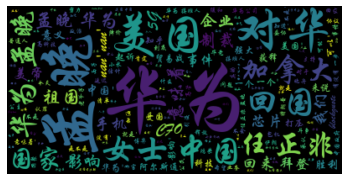

In [123]:
wordcloud = WordCloud(font_path="C:\Windows\Fonts\STXINGKA.TTF").generate(str(se_))
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
image_produce = wordcloud.to_image()
image_produce.show()